In [2]:
from sklearn.datasets import load_diabetes # 사이킷런에서 데이터 세트 import
diabetes = load_diabetes() # python dictionary 자료형과 유사
print(diabetes.data.shape, diabetes.target.shape) # 입력 데이터, target 데이터

"""
data는 442 x 10인 2차원 배열 
    행 = sample
    열 = feature
target은 442 길이의 1차원 배열

(442, 10) (442,)


In [3]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
diabetes.target[:3]

array([151.,  75., 141.])

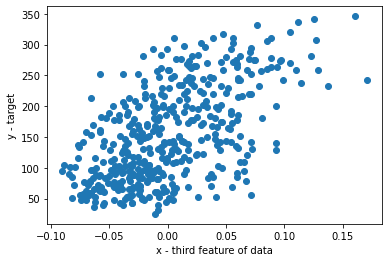

In [10]:
# 산점도 생성

import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target) # 3번 특성과 target만 그림. 3차원 그래프는 불가능
plt.xlabel('x - third feature of data')
plt.ylabel('y - target')
plt.show()

In [12]:
# 훈련 데이터 셋
x = diabetes.data[:, 2]
y = diabetes.target

# w와 b 초기화
w = 1.0
b = 1.0

In [13]:
# 무작위 샘플의 y_hat 값 계산

y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


In [14]:
# target y 와 y_hat값 비교
print(y[0])

151.0


In [18]:
# w 값 조정
w_inc = w + 1.0
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.123392413037377


In [19]:
# 예측값 증가 정도 확인하기
w_rate = (y_hat_inc - y_hat)/(w_inc - w) # 이 변화율 = x[0]에 대한 w의 변화율 = x[0]
print(w_rate)

0.061696206518688346


# 변화율을 이용한 가중치(w)와 절편(b) 업데이트

In [21]:
# 변화율을 이용한 y_hat 값 증가시키기(감소 아님), w 업데이트하기
"""
변화율을 단순히 더해주면 y_hat 값이 증가됨)
"""

w_new = w + w_rate
print(w_new)

1.0616962065186883


In [25]:
# 변화율을 이용한 y_hat 값 증가시키기(감소 아님), b 업데이트하기

b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print("y_hat_inc = ", y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print("b_rate = ", b_rate)

b_new = b + b_rate
print("b_new = ", b_new)

y_hat_inc =  1.1616962065186887
b_rate =  1.0
b_new =  2.0


## 이 방법이 수동적인 이유?
 1. y hat이 y보다 훨씬 작으면 w와 b를 큰 폭으로 수정할 수 없다.
 2. y_hat이 y보다 커지면 감소시킬 수 없다.

# 오차 역전파
y_hat과 y의 차이로 w와 b를 업데이트한다.
오차를 연이어 전파하면서 수행한다. y_hat에서 y를 뺀 오차의 양을 변화율에 곱해서 업데이트.

In [26]:
err = y[0] - y_hat # 오차
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904455 150.9383037934813


In [28]:
# x[1]을 사용한 오차를 구하고 w와 b 업데이트

y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1] # 가중치 변화량 = 샘플
w_new = w_new + w_rate * err
b_new = b_new + 1 * err # b_rate = 1
print(w_new, b_new)

14.132317616381709 75.52764127612664


In [29]:
# 반복문으로 구현

for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

print(w, b)

587.8654539985689 99.40935564531424


<function matplotlib.pyplot.show>

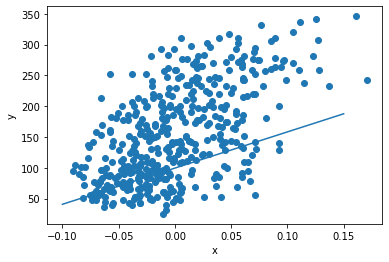

In [31]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [33]:
# 여러번 반복하기 

for i in range(1, 500):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err

print(w, b)

913.5973364345905 123.39414383177204


y_hat = 913.6x + 123.4

<function matplotlib.pyplot.show>

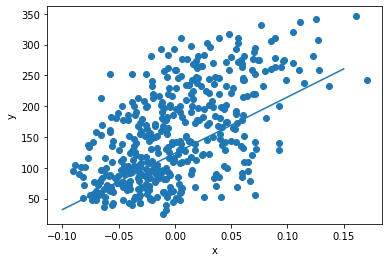

In [34]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
# 예측해보기

x_new = 0.2
y_pred = x_new * w + b
print(y_pred)

306.11361111869013


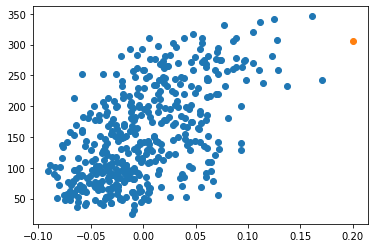

In [36]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.show()